In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('California Housing Dataset.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
1,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
2,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
3,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
4,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0


In [ ]:
df.shape

(11900, 9)

In [ ]:
df.isna().sum().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           11900 non-null  float64
 1   latitude            11900 non-null  float64
 2   housing_median_age  11900 non-null  float64
 3   total_rooms         11900 non-null  float64
 4   total_bedrooms      11900 non-null  float64
 5   population          11900 non-null  float64
 6   households          11900 non-null  float64
 7   median_income       11900 non-null  float64
 8   median_house_value  11900 non-null  float64
dtypes: float64(9)
memory usage: 836.8 KB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,-119.561300,35.630875,28.570000,2625.913529,535.715294,1422.005714,497.933025,3.878134,207429.989664
std,2.006037,2.146573,12.627848,2169.800083,418.897078,1161.546143,382.353240,1.898538,116187.191061
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.780000,33.930000,18.000000,1439.750000,291.750000,779.000000,278.000000,2.568050,119775.000000
50%,-118.490000,34.250000,29.000000,2106.000000,431.000000,1156.000000,406.000000,3.538650,180150.000000
75%,-118.000000,37.720000,37.000000,3146.000000,648.000000,1717.250000,604.000000,4.760975,265000.000000
max,-114.470000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **Analyse** **univariée**

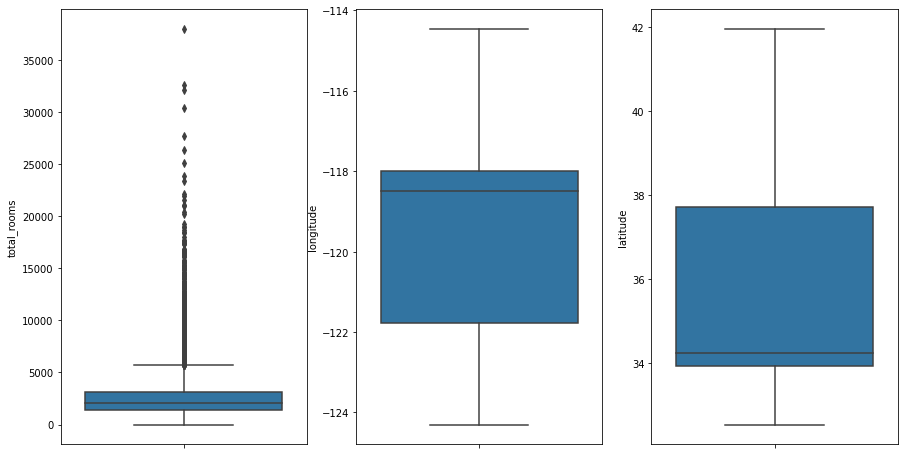

In [ ]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=3)
sns.boxplot(y = 'total_rooms', data= df, ax = axe[0])
sns.boxplot(y = 'longitude', data= df, ax= axe[1])
sns.boxplot(y = 'latitude', data= df, ax= axe[2])

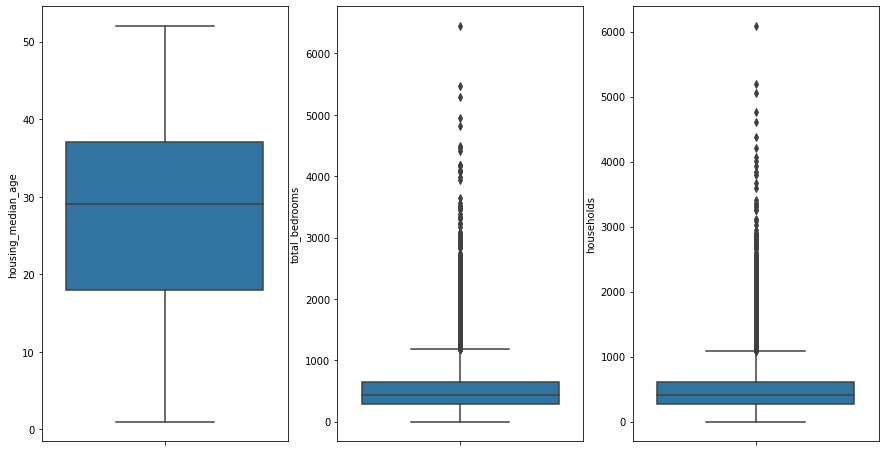

In [ ]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=3)
sns.boxplot(y = 'housing_median_age', data =df, ax = axe[0])
sns.boxplot(y = 'total_bedrooms', data = df, ax = axe[1])
sns.boxplot(y = 'households', data= df, ax = axe[2])

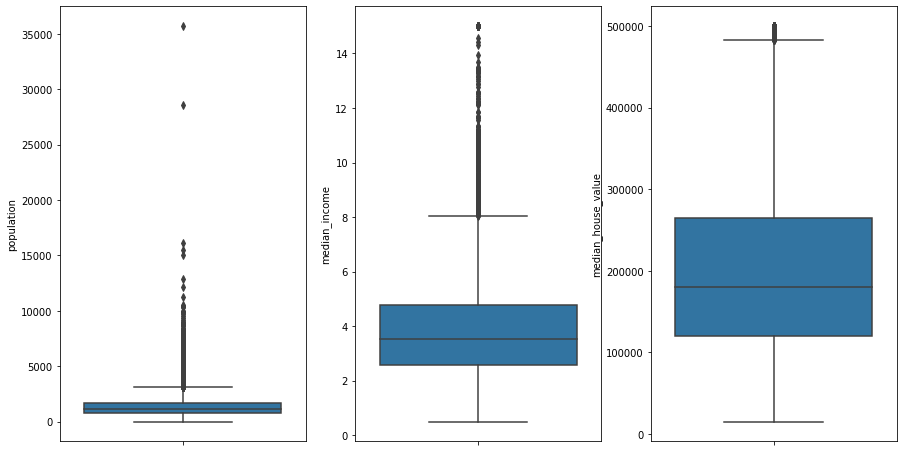

In [ ]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=3)
sns.boxplot(y = 'population', data= df, ax = axe[0])
sns.boxplot(y = 'median_income', data= df, ax = axe[1])
sns.boxplot(y = 'median_house_value', data= df, ax = axe[2] )

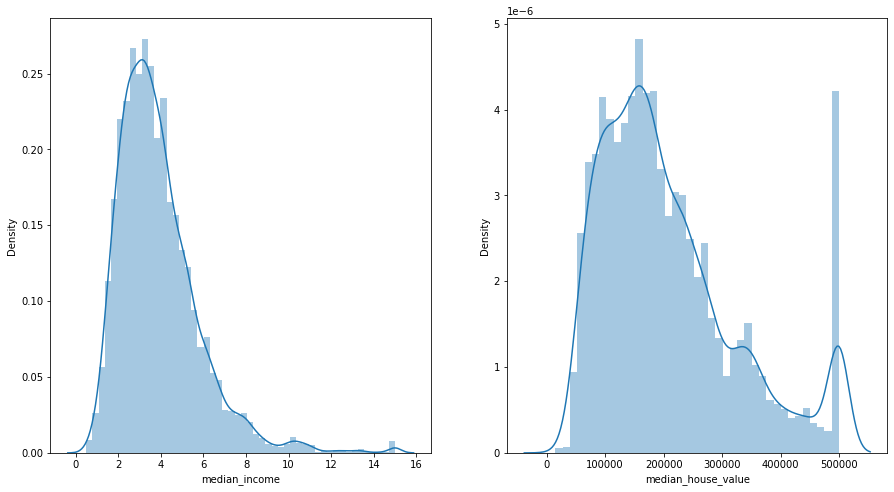

In [ ]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=2)
sns.distplot(df['median_income'], kde = True, ax=axe[0]);
sns.distplot(df['median_house_value'], kde = True, ax =axe[1]);

# **Analyse Multivariée**

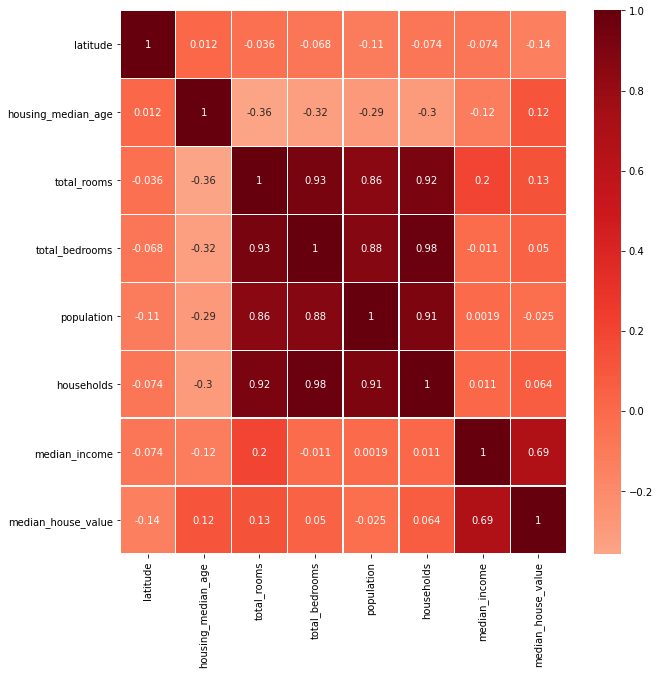

In [ ]:

plt.figure(figsize=(10,10))
sns.heatmap(df[list(df.columns[1:11])].corr(), 
            annot=True,
            linewidths=.4,
            center=0,
            cmap="Reds")
plt.show()

In [ ]:
# identificationn des valeurs aberrantes
# valeur < Q1 - 1.5*IQR ou Valeur > Q3+1.5*IQR

def values_outliers(data, variable_name):
  iqr = data[variable_name].quantile(0.75)-data[variable_name].quantile(0.25)
  inf = data[variable_name].quantile(0.25) - 1.5*iqr
  sup = data[variable_name].quantile(0.75) + 1.5*iqr
  return data[(data[variable_name]<inf) | (data[variable_name] > sup)]

In [ ]:
values_outliers(df, 'households').sort_values('households', ascending = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
406,-117.02,33.81,10.0,6317.0,1335.0,2625.0,1094.0,2.3000,108900.0
5320,-118.37,34.14,21.0,4670.0,1161.0,1914.0,1094.0,3.7986,367700.0
4122,-118.20,33.80,42.0,4577.0,1146.0,2749.0,1094.0,2.5012,197500.0
1866,-117.67,34.09,17.0,4418.0,1256.0,2417.0,1094.0,2.7266,101000.0
3671,-118.14,34.05,25.0,5478.0,1136.0,3062.0,1096.0,3.4118,341100.0
...,...,...,...,...,...,...,...,...,...
1467,-117.34,33.98,10.0,17286.0,4952.0,9851.0,4616.0,1.7579,103400.0
1604,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0
2098,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0
2024,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0


### Il y a 386 valeurs aberrantes sur la variable median_value

In [ ]:
values_outliers(df, 'median_house_value').sort_values('median_house_value')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2354,-117.87,33.60,34.0,3415.0,779.0,1275.0,718.0,4.4980,482900.0
6126,-118.59,34.14,19.0,1303.0,155.0,450.0,145.0,10.5511,483100.0
1681,-117.53,33.69,6.0,454.0,102.0,213.0,43.0,10.9704,483300.0
10289,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0
10675,-122.27,37.55,15.0,1958.0,282.0,811.0,284.0,8.1221,483300.0
...,...,...,...,...,...,...,...,...,...
5522,-118.40,34.07,22.0,2170.0,593.0,850.0,520.0,2.9107,500001.0
5523,-118.40,34.06,52.0,1871.0,326.0,646.0,284.0,8.2961,500001.0
5524,-118.40,34.06,47.0,3652.0,967.0,1438.0,887.0,3.6964,500001.0
5526,-118.40,34.05,43.0,1028.0,145.0,394.0,149.0,10.4519,500001.0


Il y a 641 valeurs aberrantes sur la variable median_value

In [ ]:
#df_outliers = df[['total_rooms', 'total_bedrooms', 'households', 'population', 'median_income', 'median_house_value']]

### Remplaçons les valeurs aberrantes e utilisant la méthode d'imputation

In [ ]:
iqr_variable_name = df['total_rooms'].quantile(0.75) - df['total_rooms'].quantile(0.25)
df['total_rooms'].quantile(0.75) + 1.5*iqr_variable_name

5705.375

In [ ]:
#iqr_variable_name = df['total_rooms'].quantile(0.75) - df['total_rooms'].quantile(0.25)
df.loc[(values_outliers(df, 'total_rooms').index, 'total_rooms')] = df['total_rooms'].quantile(0.75) + 1.5*iqr_variable_name


In [ ]:
iqr_variable_name = df['total_bedrooms'].quantile(0.75) - df['total_bedrooms'].quantile(0.25)
df['total_bedrooms'].quantile(0.75) + 1.5*iqr_variable_name

df.loc[(values_outliers(df, 'total_bedrooms').index, 'total_bedrooms')] = df['total_bedrooms'].quantile(0.75) + 1.5*iqr_variable_name

In [ ]:
iqr_variable_name = df['households'].quantile(0.75) - df['households'].quantile(0.25)
df['households'].quantile(0.75) + 1.5*iqr_variable_name

df.loc[(values_outliers(df, 'households').index, 'households')] = df['households'].quantile(0.75) + 1.5*iqr_variable_name

In [ ]:
iqr_variable_name = df['population'].quantile(0.75) - df['population'].quantile(0.25)
df['population'].quantile(0.75) + 1.5*iqr_variable_name

df.loc[(values_outliers(df, 'population').index, 'population')] = df['population'].quantile(0.75) + 1.5*iqr_variable_name

In [ ]:
iqr_variable_name = df['median_income'].quantile(0.75) - df['median_income'].quantile(0.25)
df['median_income'].quantile(0.75) + 1.5*iqr_variable_name

df.loc[(values_outliers(df, 'median_income').index, 'median_income')] = df['median_income'].quantile(0.75) + 1.5*iqr_variable_name

In [ ]:
iqr_variable_name = df['median_house_value'].quantile(0.75) - df['median_house_value'].quantile(0.25)
df['median_house_value'].quantile(0.75) + 1.5*iqr_variable_name

df.loc[(values_outliers(df, 'median_house_value').index, 'median_house_value')] = df['median_house_value'].quantile(0.75) + 1.5*iqr_variable_name

### Verifions a nouveau les valeurs aberrantes

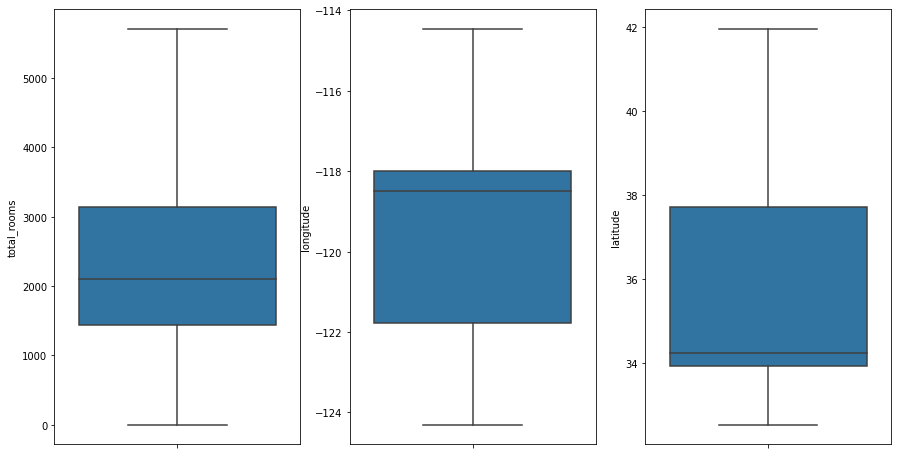

In [ ]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=3)
sns.boxplot(y = 'total_rooms', data= df, ax = axe[0])
sns.boxplot(y = 'longitude', data= df, ax= axe[1])
sns.boxplot(y = 'latitude', data= df, ax= axe[2])

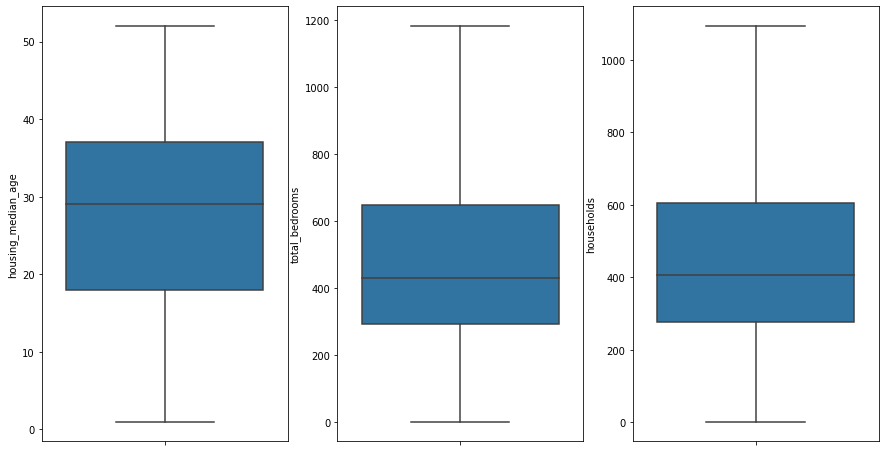

In [ ]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=3)
sns.boxplot(y = 'housing_median_age', data =df, ax = axe[0])
sns.boxplot(y = 'total_bedrooms', data = df, ax = axe[1])
sns.boxplot(y = 'households', data= df, ax = axe[2])

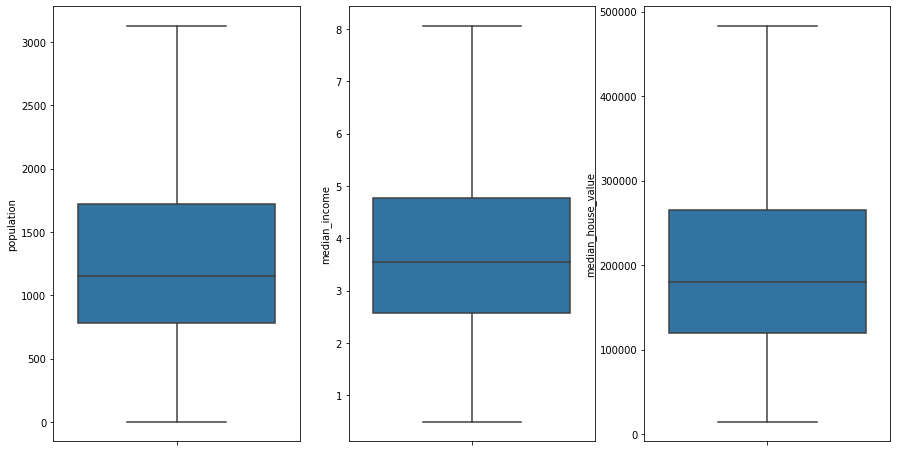

In [ ]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=3)
sns.boxplot(y = 'population', data= df, ax = axe[0])
sns.boxplot(y = 'median_income', data= df, ax = axe[1])
sns.boxplot(y = 'median_house_value', data= df, ax = axe[2] )

In [ ]:
X = df.drop(columns='median_house_value', axis = 1)
y = df['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

### Modélisation

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Calcul des différentes métriques

## MAE (Mean Absolute Error)

In [ ]:
print(f'Train :', mean_squared_error(y_train, y_pred_train))
print(f'Test :', mean_squared_error(y_test, y_pred_test))

Train : 4347304177.41629
Test : 4305106982.281134


## MSE

In [ ]:
print(f'Train :', mean_absolute_error(y_train, y_pred_train))
print(f'Test :', mean_absolute_error(y_test, y_pred_test))

Train : 49540.52486601219
Test : 48537.18450257403


## RMSE

In [ ]:
print(f'Train :', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(f'Test :', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Train : 65934.08964576891
Test : 65613.31406262857


## Coefficient de détermination

In [ ]:
print(f'Train :' ,r2_score(y_train, y_pred_train))
print(f'Test :' ,r2_score(y_test, y_pred_test))

Train : 0.6664233058609424
Test : 0.6661004083294233


In [ ]:

reg=RandomForestRegressor()
pred = reg.fit(X_train,y_train)

y_predicted = pred.predict(X_test)


In [ ]:
print(f'Test :' ,r2_score(y_test, y_predicted))

Test : 0.8253177213860825


In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

47457.893160642554


In [ ]:
from joblib import dump

dump(model, 'California Housing Dataset.joblib')

['California Housing Dataset.joblib']